In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Source of data set: [Average Co2 emmissions](https://climatedata.imf.org/pages/climatechange-data)

In [ ]:
co2_df = pd.read_csv('World_CO2_emission.csv')
co2_df.head(3)

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137


In [ ]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    215 non-null    object 
 1   country_code    215 non-null    object 
 2   Region          215 non-null    object 
 3   Indicator Name  215 non-null    object 
 4   1990            185 non-null    float64
 5   1991            186 non-null    float64
 6   1992            189 non-null    float64
 7   1993            189 non-null    float64
 8   1994            189 non-null    float64
 9   1995            190 non-null    float64
 10  1996            190 non-null    float64
 11  1997            190 non-null    float64
 12  1998            189 non-null    float64
 13  1999            189 non-null    float64
 14  2000            190 non-null    float64
 15  2001            190 non-null    float64
 16  2002            191 non-null    float64
 17  2003            191 non-null    flo

In [ ]:
fig = px.choropleth(
    co2_df,
    locations="country_code",
    color="2010",
    hover_name="Country Name",
    hover_data=["2010"],
    title="CO2 Emission(metric tons per capita) Around the world in 2010",
    color_continuous_scale=px.colors.sequential.Blues,

)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [ ]:
# INTERPRETATION: The following plot is a geaographic interactive cloropleth which helps us visualize at a glance the per capita value of CO2 emmisions in Metric tonnes for the year of 2010.

INTERPRETATION: The following plot is a geaographic interactive cloropleth which helps us visualize at a glance the per capita value of CO2 emmisions in Metric tonnes for the year of 2010. Coor is used to denote and Interpret the intensity of emmission in various parts of the world.  

In [ ]:
fig = px.choropleth(
    co2_df,
    locations="country_code",
    color="2019",
    hover_name="Country Name",
    hover_data=["2019"],
    title="CO2 Emission(metric tons per capita) Around the world in 2019",
    color_continuous_scale=px.colors.sequential.Oranges,

)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

INTERPRETATION: The following plot is a geaographic interactive cloropleth which helps us visualize at a glance the per capita value of CO2 emmisions in Metric tonnes for the year of 2019. Using the following plot, we can compare the values of Co2 Emissions and its change from 2010 to 2019.

In [ ]:
columns=np.arange(1990,2019).tolist()
columns_str = map(str,columns)
list_of_year = list(columns_str)

In [ ]:
list_of_year

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [ ]:
co2_region_df = co2_df.groupby('Region')[list_of_year].mean()


In [ ]:
co2_region_df.index

Index(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'],
      dtype='object', name='Region')

In [ ]:
co2_region_df.unstack()

      Region                    
1990  East Asia & Pacific            3.783577
      Europe & Central Asia          8.531603
      Latin America & Caribbean      2.238302
      Middle East & North Africa     7.585239
      North America                 17.278118
                                      ...    
2018  Latin America & Caribbean      3.011438
      Middle East & North Africa     8.631388
      North America                 15.436563
      South Asia                     1.297652
      Sub-Saharan Africa             0.924197
Length: 203, dtype: float64

Text(170.72222222222223, 0.5, 'Regions')

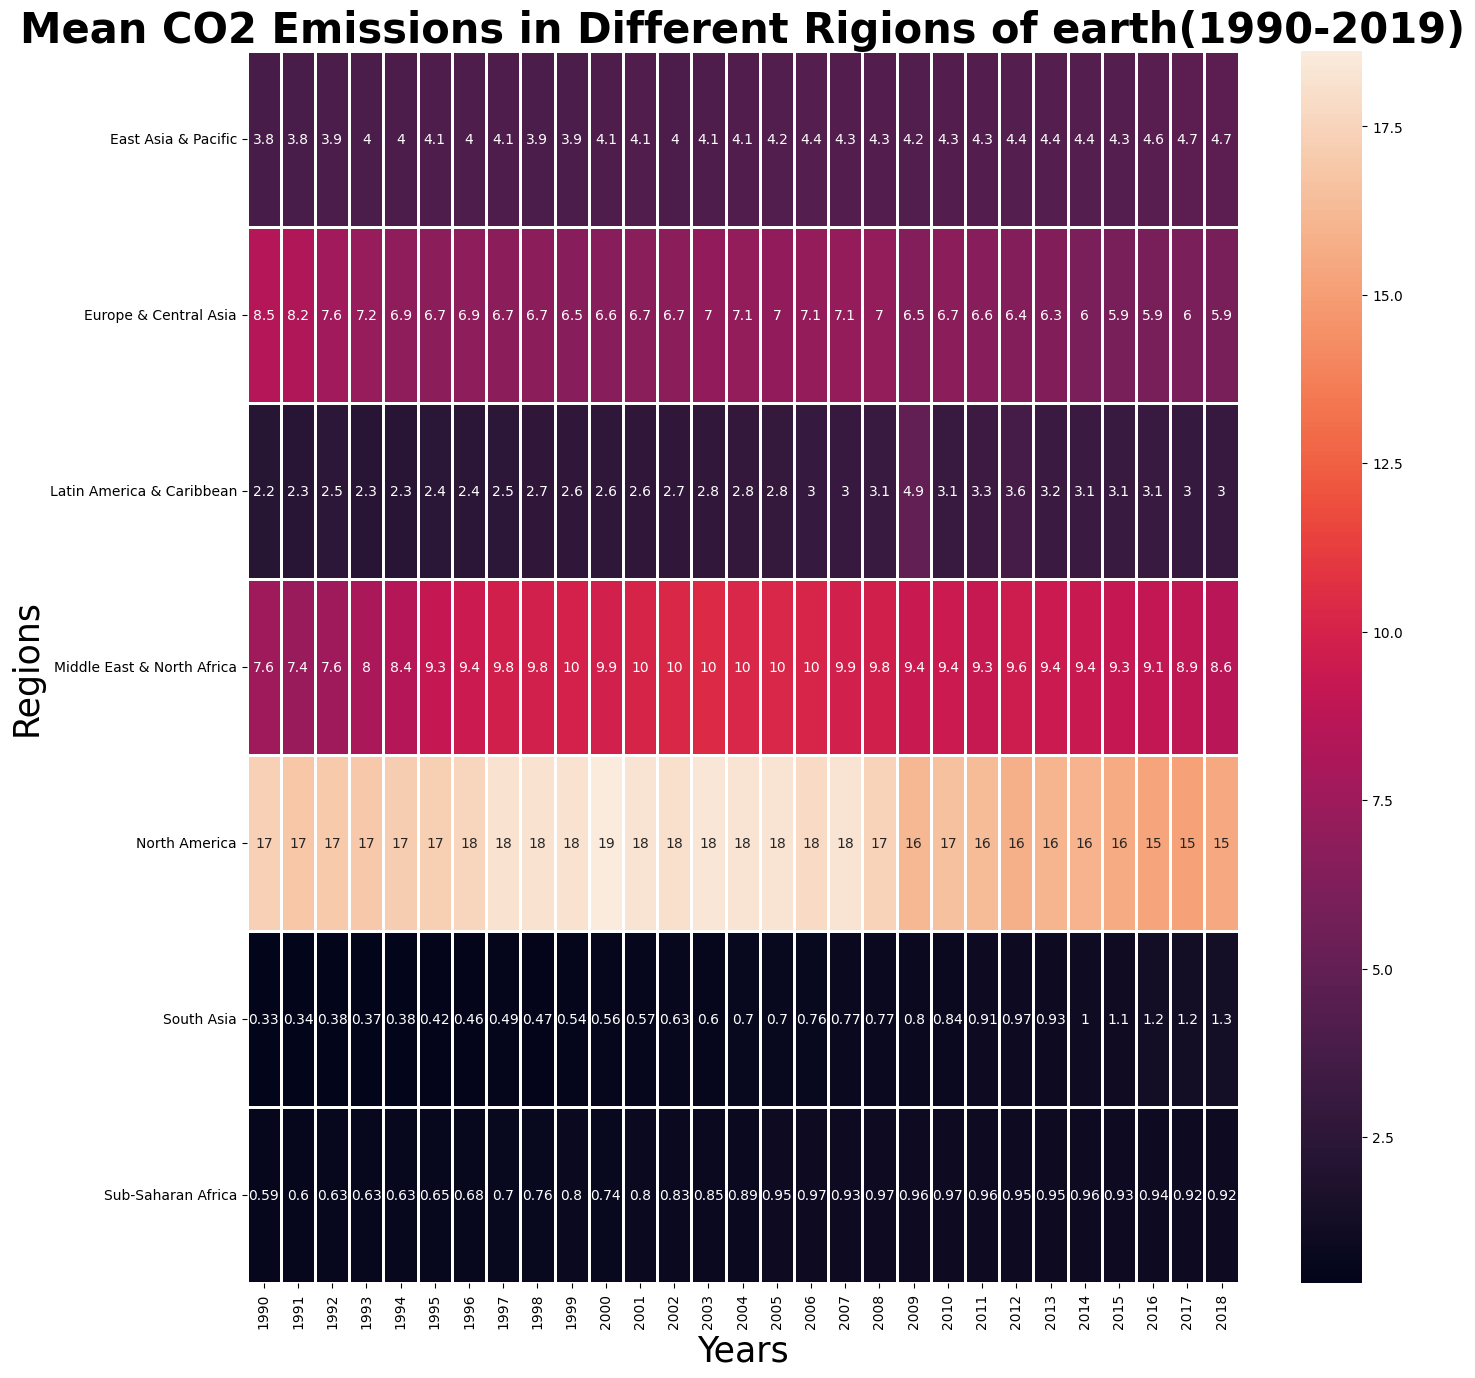

In [ ]:
plt.figure(figsize=(16,16))
plt.rcParams['font.size'] = 10
plt.title("Mean CO2 Emissions in Different Rigions of earth(1990-2019)",fontweight="bold",fontdict={'fontsize': 30})
sns.heatmap(co2_region_df,linecolor='white',linewidths=1,annot=True)
plt.xlabel('Years',fontdict={'fontsize': 25})
plt.ylabel('Regions',fontdict={'fontsize': 25})

The Following plot can be interpreted as a visualization of the mean distribution of C02 emmissions divided on the basis of intercontinental regions and timelines ranging from 1990 to 2019.